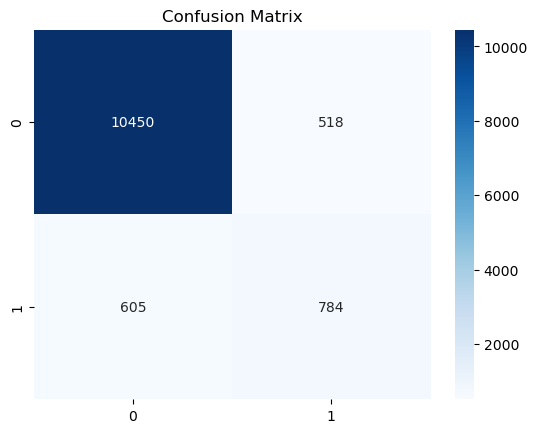

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
url = 'bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

# Split data into features (X) and target (y)
X = data.drop('y_yes', axis=1)
y = data['y_yes']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize a RandomForest Classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = clf.predict(X_test)

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], filled=True, feature_names=X.columns, class_names=['No', 'Yes'], rounded=True)
plt.title('Decision Tree')
plt.show()

# Plot Feature Importance
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
